# Probelm Statement and project goal

We have to provide the solution as per our customer's requirement with respect to this taxi trip fair data.
and passengers have to face some issues regarding trips and calculated amounts, so we have to find out all the features 
with respect to calculating the total amount and comparing it with other features, and at the end we have to provide the conclusion and recommendation what is the exact problem in this taxi trip so so it will be profitable to passengers. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('taxi.csv')

In [3]:
data

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,22.43,1,N,1,59.5,0.5,0.5,10.00,5.76,0.3,76.56,132,259,2018,5,23,2,23,2998.0,29.76
34996,9.16,1,N,1,30.0,0.0,0.5,6.58,5.76,0.3,43.14,24,138,2018,4,4,2,9,1419.0,29.15
34997,6.78,1,N,1,23.0,0.0,0.5,5.95,0.00,0.3,29.75,140,231,2018,3,7,2,8,2459.0,42.67
34998,0.26,1,N,2,3.0,0.0,0.5,0.00,0.00,0.3,3.80,142,142,2018,4,18,2,8,1932.0,26.73


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            35000 non-null  float64
 1   rate_code                35000 non-null  int64  
 2   store_and_fwd_flag       35000 non-null  object 
 3   payment_type             35000 non-null  int64  
 4   fare_amount              35000 non-null  float64
 5   extra                    35000 non-null  float64
 6   mta_tax                  35000 non-null  float64
 7   tip_amount               35000 non-null  float64
 8   tolls_amount             35000 non-null  float64
 9   imp_surcharge            35000 non-null  float64
 10  total_amount             35000 non-null  float64
 11  pickup_location_id       35000 non-null  int64  
 12  dropoff_location_id      35000 non-null  int64  
 13  year                     35000 non-null  int64  
 14  month                 

In [5]:
data.describe()

,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.0,35000.000000,35000.000000,35000.000000,35000.000000,35000.00000,35000.000000
mean,9.088815,1.110086,1.123400,31.920911,0.320337,0.486929,6.142190,2.262871,0.299940,41.442469,152.543943,146.852200,2018.0,6.132429,15.337743,2.885200,13.803657,2257.38360,41.324249
std,4.496854,0.581456,0.350842,14.689516,0.402590,0.079781,4.397599,3.578315,0.004242,19.241543,59.764598,76.373292,0.0,3.342088,8.691250,1.926999,6.224485,5112.41526,19.167043
min,0.010000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,1.000000,1.000000,2018.0,1.000000,1.000000,0.000000,0.000000,1.00000,0.310000
25%,6.470000,1.000000,1.000000,24.000000,0.000000,0.500000,4.460000,0.000000,0.300000,30.350000,132.000000,87.000000,2018.0,3.000000,7.000000,1.000000,10.000000,1448.00000,30.300000
50%,8.700000,1.000000,1.000000,29.000000,0.000000,0.500000,6.050000,0.000000,0.300000,38.470000,138.000000,141.000000,2018.0,6.000000,16.000000,3.000000,14.000000,1862.00000,38.460000
75%,10.990000,1.000000,1.000000,36.000000,0.500000,0.500000,8.100000,5.760000,0.300000,48.352500,186.000000,229.000000,2018.0,9.000000,23.000000,4.000000,19.000000,2340.00000,48.200000
max,79.010000,5.000000,4.000000,400.000000,18.500000,0.500000,215.000000,189.500000,0.300000,468.350000,265.000000,265.000000,2018.0,12.000000,31.000000,6.000000,23.000000,86347.00000,468.350000


In [6]:
data.isnull().sum()

trip_distance              0
rate_code                  0
store_and_fwd_flag         0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
imp_surcharge              0
total_amount               0
pickup_location_id         0
dropoff_location_id        0
year                       0
month                      0
day                        0
day_of_week                0
hour_of_day                0
trip_duration              0
calculated_total_amount    0
dtype: int64

In [7]:
data.nunique()

trip_distance              2317
rate_code                     5
store_and_fwd_flag            2
payment_type                  4
fare_amount                 360
extra                         7
mta_tax                       2
tip_amount                 1406
tolls_amount                177
imp_surcharge                 2
total_amount               2692
pickup_location_id          216
dropoff_location_id         253
year                          1
month                        12
day                          31
day_of_week                   7
hour_of_day                  24
trip_duration              3913
calculated_total_amount    2678
dtype: int64

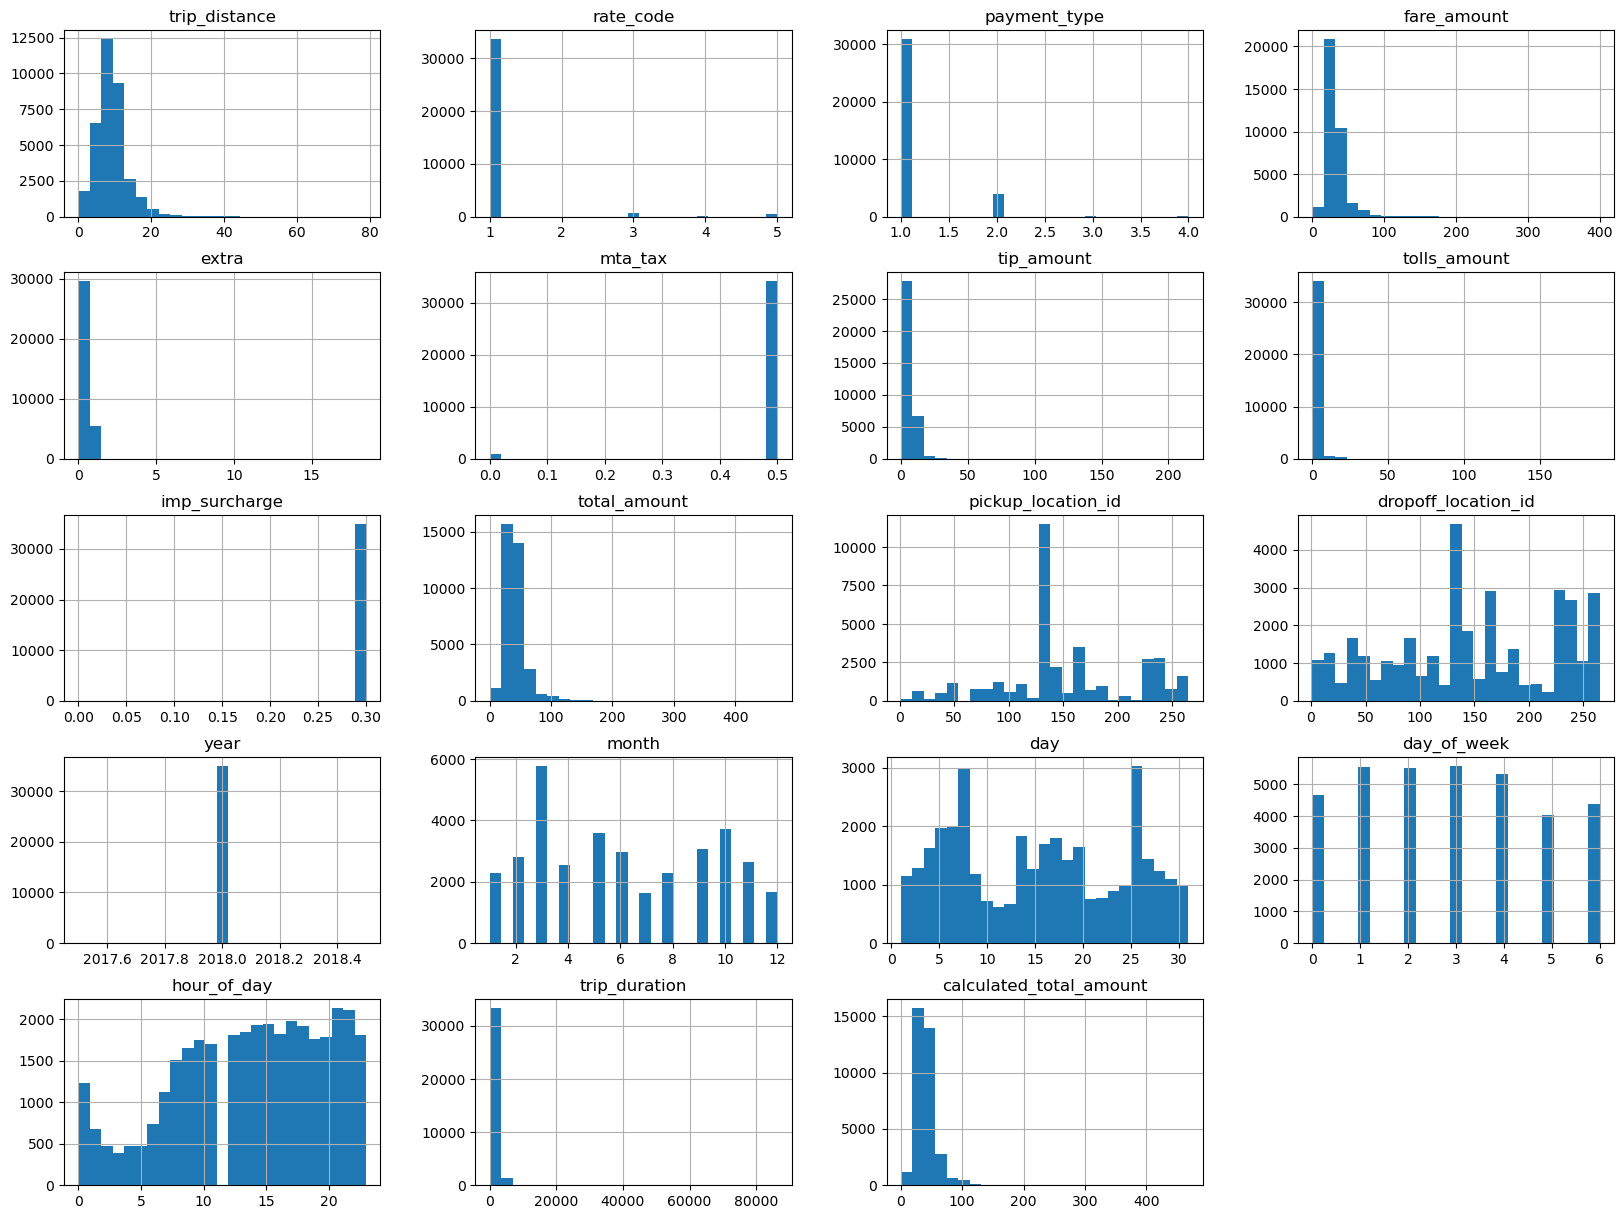

In [8]:
data.hist(bins=25, figsize=(20,15))
plt.show()

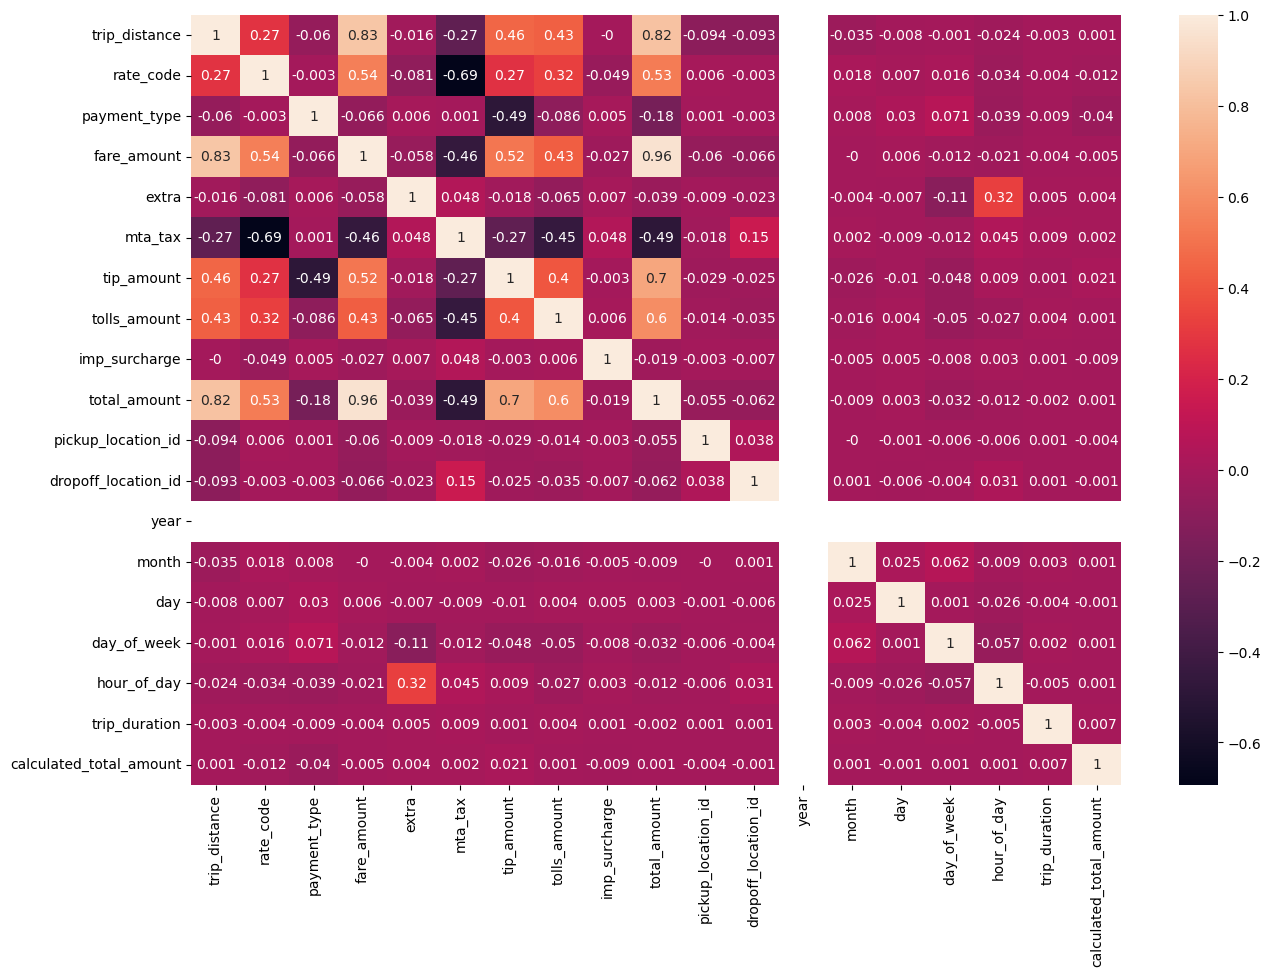

In [65]:
cor = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor.round(3),annot=True)
plt.show()

# ML modeling 

In [38]:
y = data.fare_amount

y.head()

0    26.0
1     3.0
2    41.5
3    30.0
4    21.5
Name: fare_amount, dtype: float64

In [39]:
x = data.iloc[:,[0,4,5,6,7,8,9,10,18]]

In [40]:
x.head()

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,trip_duration
0,9.01,26.0,0.0,0.5,8.14,5.76,0.3,40.70,2131.0
1,0.20,3.0,0.0,0.5,0.75,0.00,0.3,4.55,2377.0
2,9.65,41.5,0.0,0.5,9.61,5.76,0.3,57.67,1286.0
3,9.50,30.0,0.5,0.5,9.25,5.76,0.3,46.31,2586.0
4,5.80,21.5,0.5,0.5,4.56,0.00,0.3,27.36,1575.0


In [41]:
data.shape

(35000, 20)

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state= 101)

In [43]:
x_train.shape

(28000, 9)

In [44]:
x_test.shape

(7000, 9)

In [45]:
# Standardizing the dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
x_train = scaler.fit_transform(x_train)

In [47]:
x_test = scaler.transform(x_test)

In [48]:
x_train

array([[-8.28628581e-02, -2.98536753e-01,  4.53265176e-01, ...,
         1.46400698e-02, -4.48795423e-01, -1.50525496e-01],
       [-1.95609512e+00, -1.95565161e+00,  1.71208534e+00, ...,
         1.46400698e-02, -1.85446472e+00, -1.15064061e-01],
       [-4.57955850e-01, -3.66174094e-01, -8.05554991e-01, ...,
         1.46400698e-02, -4.50874815e-01, -1.34424088e-01],
       ...,
       [-1.43145660e-01, -2.30899412e-01,  4.53265176e-01, ...,
         1.46400698e-02, -2.94920381e-01, -1.82344946e-01],
       [ 6.39195664e+00,  6.56665335e+00,  4.53265176e-01, ...,
         1.46400698e-02,  5.75091319e+00,  2.62956812e-03],
       [-6.85690881e-01, -5.01448776e-01,  4.53265176e-01, ...,
         1.46400698e-02, -5.44967324e-01, -9.70458179e-02]])

In [66]:
x_test

array([[-2.53092082e-04, -1.97080742e-01,  1.71208534e+00, ...,
         1.46400698e-02, -1.52481997e-01,  5.21050342e-04],
       [ 7.67794463e-01,  1.07287292e-01,  4.53265176e-01, ...,
         1.46400698e-02, -3.44825800e-01, -2.13589346e-01],
       [-5.82986847e-01, -5.35267447e-01,  4.53265176e-01, ...,
         1.46400698e-02, -5.75638362e-01, -2.18764799e-01],
       ...,
       [ 7.20907839e-01,  3.77836656e-01, -8.05554991e-01, ...,
         1.46400698e-02,  2.34804848e-01, -1.36635238e-02],
       [-4.66886635e-01, -5.35267447e-01,  4.53265176e-01, ...,
         1.46400698e-02, -6.41139225e-01, -4.27103552e-03],
       [-9.49149054e-01, -7.04360799e-01,  4.53265176e-01, ...,
         1.46400698e-02, -7.31592797e-01, -1.19664463e-01]])

In [49]:
# Linear Regression
from sklearn.linear_model import LinearRegression
#cross validation
from sklearn.model_selection import cross_val_score

In [50]:
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [51]:
mse = cross_val_score(model_lr, x_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [52]:
mse

array([-1.58074539e-26, -6.28586908e-28, -6.12220410e-28, -1.94555638e-28,
       -2.83426454e-28, -4.82273637e-28, -5.72679209e-29, -7.48845372e-28,
       -1.30189096e-28, -7.10777199e-28])

In [53]:
np.mean(mse)

-1.965559656046968e-27

In [54]:
# prediction 
reg_pred = model_lr.predict(x_test)

In [55]:
reg_pred

array([29. , 33.5, 24. , ..., 37.5, 24. , 21.5])

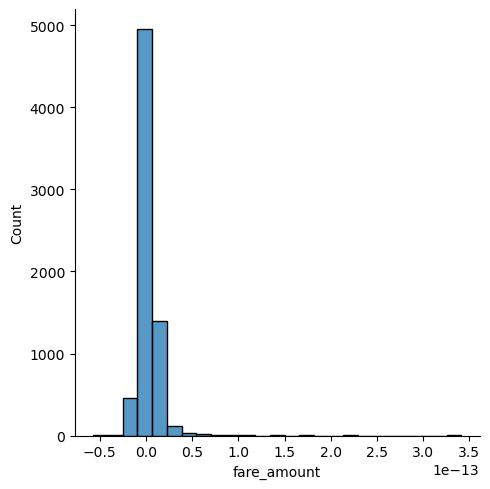

In [56]:
import seaborn as sns 
sns.displot(reg_pred-y_test, bins=25)

In [57]:
from sklearn.metrics import r2_score


In [58]:
r2_score(y_test,reg_pred)

1.0

In [59]:
# performance analysis on test data 
from sklearn import metrics
reg_pred = model_lr.predict(x_test)
print("d2_tweedie_score : ",metrics.d2_tweedie_score(y_test,reg_pred))
print("metrics.mean_absolute_error : ",metrics.mean_absolute_error(y_test,reg_pred))
print("metrics.mean_squared_error : ",metrics.mean_squared_error(y_test,reg_pred))
print("explained_variance_score : ",metrics.explained_variance_score(y_test,reg_pred))

d2_tweedie_score :  1.0
metrics.mean_absolute_error :  6.496692073199029e-15
metrics.mean_squared_error :  1.2930293933612587e-28
explained_variance_score :  1.0


In [60]:
# performance analysis on train data 
from sklearn import metrics
reg_pred2 = model_lr.predict(x_train)
print("d2_tweedie_score : ",metrics.d2_tweedie_score(y_train,reg_pred2))
print("metrics.mean_absolute_error : ",metrics.mean_absolute_error(y_train,reg_pred2))
print("metrics.mean_squared_error : ",metrics.mean_squared_error(y_train,reg_pred2))
print("explained_variance_score : ",metrics.explained_variance_score(y_train,reg_pred2))

d2_tweedie_score :  1.0
metrics.mean_absolute_error :  6.653477805909239e-15
metrics.mean_squared_error :  1.2381550532857627e-28
explained_variance_score :  1.0


In [61]:
# K Nearest Neighbors  Regression

from sklearn.neighbors import KNeighborsRegressor

model_knnr = KNeighborsRegressor()

model_knnr.fit(x_train,y_train)

predict_price_knnr = model_knnr.predict(x_test)

r2_score(predict_price_knnr,y_test)*100

98.10496488278557

In [62]:
# Decision Tress Regression

from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor()

model_dtr.fit(x_train,y_train)

predict_price_dtr = model_dtr.predict(x_test)

r2_score(predict_price_dtr,y_test)*100


97.29650362169481

In [63]:

# Random Forest Reggresorm

from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor()

model_rfr.fit(x_train,y_train)

predict_price_rfr = model_rfr.predict(x_test)

r2_score(predict_price_rfr,y_test)*100


99.84047451042909

In [64]:
# Support Vector Regressor

from sklearn.svm import SVR

model_svr = SVR()

model_svr.fit(x_train,y_train)

predict_price_svr = model_svr.predict(x_test)

r2_score(predict_price_svr,y_test)*100

69.94592152241734